In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sbpy.photometry import HG1G2

import sys
sys.path.append("/home/bcarry/Documents/softs/ocapy/ssp/")
import ssptools

from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
# Get ephemerides
ephemcc = ssptools.ephemcc(22, '2023-01-01', nbd=200, step='10d', observer='010' )

In [3]:
# Fix parameters
g1 = 0.05
g2 = 0.5

ra0 = np.radians(195)
dec0 = np.radians(-2)
R = 0.7

In [4]:
ephemcc

,Date,LAST,RA,DEC,HA,Az,H,Dobs,Dhelio,VMag,Phase,Elong.,AM,dRAcosDEC,dDEC,RV
0,2459945.5,07:09:14.92,+13:20:18.7595,+05:40:10.201,17.815601,83.994272,1.927103,2.938362,2.995983,12.512236,19.044712,83.790477,20.039910,0.527484,-0.091743,-22.682183
1,2459955.5,07:48:40.55,+13:28:04.0732,+05:23:46.957,18.343465,89.646846,7.447226,2.808617,3.005148,12.422346,19.092460,91.819391,7.320092,0.434632,-0.042507,-22.841510
2,2459965.5,08:28:06.14,+13:34:13.5807,+05:19:31.535,18.897934,95.505544,13.397526,2.679328,3.014181,12.315152,18.740800,100.245836,4.240564,0.325734,0.009195,-22.492826
3,2459975.5,09:07:31.72,+13:38:31.8512,+05:27:43.133,19.483296,101.765095,19.760699,2.553836,3.023072,12.191066,17.935208,109.098215,2.934160,0.201293,0.060586,-21.490540
4,2459985.5,09:46:57.30,+13:40:45.7364,+05:47:52.557,20.103212,108.700898,26.479054,2.435916,3.031814,12.051519,16.638592,118.378033,2.233321,0.064311,0.108590,-19.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2461895.5,15:17:18.85,+13:03:47.7659,+07:52:46.219,2.225301,229.046496,43.812681,2.223854,3.107495,11.688579,10.601401,145.460299,1.442781,-0.408292,-0.064101,13.362234
196,2461905.5,15:56:44.42,+12:58:15.4021,+07:29:40.746,2.974727,240.514233,36.866644,2.310645,3.114402,11.871829,13.115379,135.634200,1.663645,-0.293848,-0.129291,17.000487
197,2461915.5,16:36:09.96,+12:54:39.6093,+06:51:47.395,3.691763,249.604025,29.348674,2.416282,3.121081,12.048387,15.218097,126.005614,2.033503,-0.165880,-0.187311,19.969419
198,2461925.5,17:15:35.54,+12:53:08.0803,+06:01:02.623,4.374294,257.053898,21.659581,2.536729,3.127527,12.213603,16.832775,116.765231,2.691542,-0.035254,-0.235996,22.192077


In [5]:
# Dist function
f = 5*np.log10( ephemcc.Dobs * ephemcc.Dhelio ) 

In [6]:
# Phase function
ph = np.radians( ephemcc.Phase )

arg = g1 * HG1G2._phi1(ph) + g2 * HG1G2._phi2(ph) + (1 - g1 - g2) * HG1G2._phi3(ph)
g = -2.5 * np.log10(arg)

In [7]:
# Spin function
coords = SkyCoord( ephemcc.RA, ephemcc.DEC, unit=(u.hourangle, u.deg) )
ra = coords.ra.radian
dec = coords.dec.radian


cosL = np.sin(dec)*np.sin(dec0) + np.cos(dec)*np.cos(dec0)*np.cos(ra-ra0)

s = 2.5*np.log10( 1 - (1-R)*np.abs(cosL) )

Text(0, 0.5, 's($\\alpha,\\delta$)')

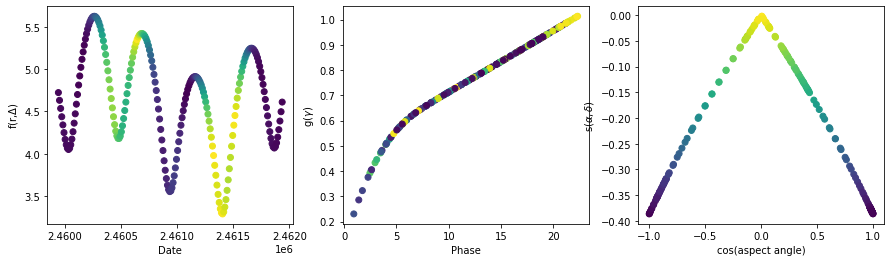

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Date
ax[0].scatter( ephemcc.Date, f, c=s )
ax[0].set_xlabel('Date')
ax[0].set_ylabel('f(r,$\Delta$)')

# Phase
ax[1].scatter( ephemcc.Phase, g, c=s )
ax[1].set_xlabel('Phase')
ax[1].set_ylabel('g($\gamma$)')

# Spin
ax[2].scatter( cosL, s, c=s )
ax[2].set_xlabel('cos(aspect angle)')
ax[2].set_ylabel('s($\\alpha,\delta$)')


In [9]:
# Build apparent magnitude
H = 6.6
m = H + f + g + s 

Text(0, 0.5, '$\\delta$ / deg')

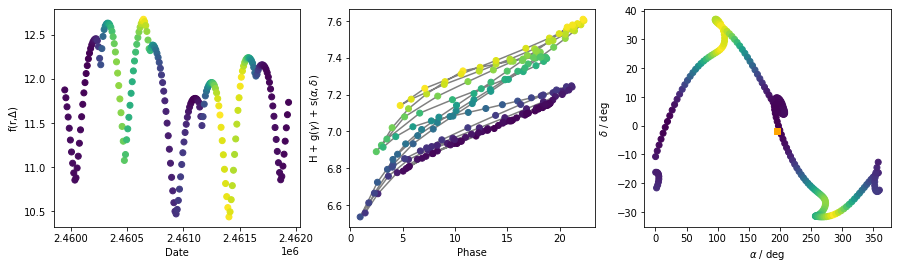

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Date
ax[0].scatter( ephemcc.Date, m, c=s )
ax[0].set_xlabel('Date')
ax[0].set_ylabel('f(r,$\Delta$)')

# Phase
ax[1].plot( ephemcc.Phase, H+g+s, zorder=-1, color='gray' )
ax[1].scatter( ephemcc.Phase, H+g+s , c=s )
ax[1].set_xlabel('Phase')
ax[1].set_ylabel('H + g($\gamma$) + s($\\alpha,\delta$)')

# Celestial sphere
ax[2].scatter( np.degrees(ra), np.degrees(dec), c=s )
ax[2].scatter( np.degrees(ra0), np.degrees(dec0), color='orange', marker='s' )
ax[2].set_xlabel('$\\alpha$ / deg')
ax[2].set_ylabel('$\delta$ / deg')